# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Debate**


In [300]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [355]:
# results_file = 'parallel_debate_runs/run_20251020_131736/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_135407/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_141121/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_074342/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_080557/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_091635/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_093704/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_094113/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_104033/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_134408/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_142720/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_144301/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_134354/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_134546/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251022_141028/master_results.jsonl'
results_file = 'parallel_debate_runs/run_20251022_142600/master_results.jsonl'

results_df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
results_df.head()

run_id                  timestamp  question.question_idx  \
0  808e1f71 1970-08-23 09:17:02.142642                    302   
1  cf5b14ab 1970-08-23 09:17:02.142643                    366   
2  18803ce8 1970-08-23 09:17:02.142644                     79   
3  d6f02d53 1970-08-23 09:17:02.142644                     47   
4  e2dabfbb 1970-08-23 09:17:02.142646                    282   

  question.choices_selected  \
0                    [0, 2]   
1                    [0, 3]   
2                    [1, 0]   
3                    [0, 1]   
4                    [3, 0]   

                              question.choice_values question.is_correct  \
0  [In silico testing of drug interaction with th...       [True, False]   
1  [The increased pH of the solution, The increas...       [True, False]   
2  [A three-body bound state may occur sometimes,...       [False, True]   
3  [Polycomb complexes are involved in mediating ...       [True, False]   
4  [Oxidative stress > Endothelial dysfunction, E...       [False, True]   

  question.dataset_name question.dataset_subset question.dataset_split  \
0       Idavidrein/gpqa               gpqa_main                  train   
1       Idavidrein/gpqa               gpqa_main                  train   
2       Idavidrein/gpqa               gpqa_main                  train   
3       Idavidrein/gpqa               gpqa_main                  train   
4       Idavidrein/gpqa               gpqa_main                  train   

  debater_direct.correct  debater_direct.confidence  debater_direct.cached  \
0                   True                      100.0                   True   
1                   True                       95.0                   True   
2                   True                      100.0                   True   
3                  False                       95.0                   True   
4                  False                       95.0                   True   

   judge_direct.correct  judge_direct.confidence  judge_direct.cached  \
0                  True                       80                False   
1                  True                       80                False   
2                 False                       80                False   
3                  True                       80                False   
4                 False                       80                False   

   modes.non_interactive.turns modes.non_interactive.winner  \
0                          4.0                            B   
1                          3.0                            A   
2                          4.0                            B   
3                          4.0                            B   
4                          4.0                            B   

  modes.non_interactive.correct  modes.non_interactive.confidence  
0                         False                              80.0  
1                          True                              80.0  
2                          True                              80.0  
3                         False                              80.0  
4                          True                              70.0

In [356]:
correct_cols = results_df.filter(like='correct').drop(columns='question.is_correct')
accuracies = pd.DataFrame({
    'accuracy': correct_cols.mean(),
    'total_count': correct_cols.count()
})
accuracies

accuracy  total_count
debater_direct.correct         0.824176           91
judge_direct.correct               0.53          100
modes.non_interactive.correct  0.530612           98

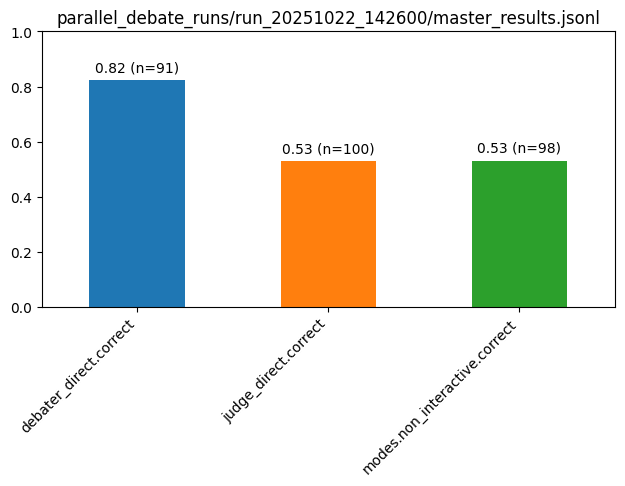

In [357]:
from matplotlib import pyplot as plt
ax = accuracies['accuracy'].plot.bar(color=plt.cm.tab10.colors, ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for bar, (idx, row) in zip(ax.patches, accuracies.iterrows()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{row["accuracy"]:.2f} (n={int(row["total_count"])})', 
            ha='center', va='bottom')
plt.tight_layout()
plt.title(results_file)
plt.show()

In [268]:
mode_prefix = 'modes.non_interactive'

results_df[f'{mode_prefix}.turns'].value_counts()


modes.non_interactive.turns
4    62
3    15
5    11
2     5
6     1
Name: count, dtype: int64

In [269]:
# Get the non interactive turns on correct vs incorrect debater answers
results_df[results_df[f'{mode_prefix}.correct'] == True][f'{mode_prefix}.turns'].describe()

count    76.000000
mean      3.802632
std       0.693200
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: modes.non_interactive.turns, dtype: float64

In [270]:

results_df[results_df[f'{mode_prefix}.correct'] == False][f'{mode_prefix}.turns'].describe()

count    18.000000
mean      4.166667
std       0.785905
min       3.000000
25%       4.000000
50%       4.000000
75%       4.750000
max       6.000000
Name: modes.non_interactive.turns, dtype: float64

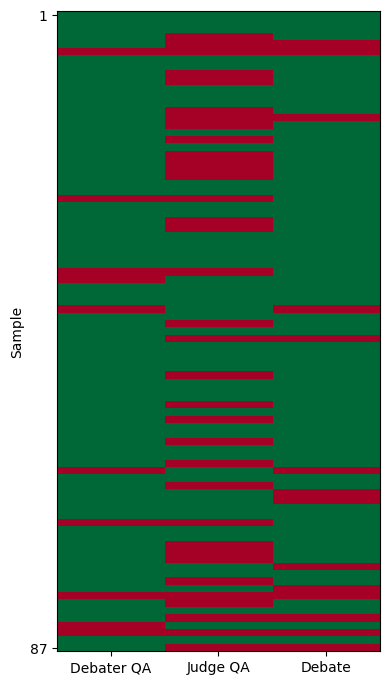

In [271]:
import matplotlib.pyplot as plt
import numpy as np

data = results_df[['debater_direct.correct', 'judge_direct.correct', f'{mode_prefix}.correct']].dropna().astype(float).values
fig, ax = plt.subplots(figsize=(4, max(6, len(data) * 0.08)))
im = ax.imshow(data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1, interpolation='nearest')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Debater QA', 'Judge QA', 'Debate'])
ax.set_ylabel('Sample')
ax.set_yticks([0, len(data)-1])
ax.set_yticklabels([1, len(data)])
plt.tight_layout()
plt.show()


In [273]:
results_df[['debater_direct.correct',  'judge_direct.correct', f'{mode_prefix}.correct']].value_counts()

debater_direct.correct  judge_direct.correct  modes.non_interactive.correct
True                    True                  True                             44
                        False                 True                             24
                                              False                             5
                        True                  False                             4
False                   False                 False                             3
                                              True                              3
                        True                  False                             2
                                              True                              2
Name: count, dtype: int64

In [264]:
results_df[f'{mode_prefix}.winner'].value_counts()

modes.non_interactive.winner
B    53
A    42
Name: count, dtype: int64

In [256]:
pd.crosstab(results_df[f'{mode_prefix}.winner'], results_df[f'{mode_prefix}.correct'], rownames=['Winner'], colnames=['Correct'])

Correct  False  True 
Winner               
A           13     41
B           12     34

### Cross-experiment comparison

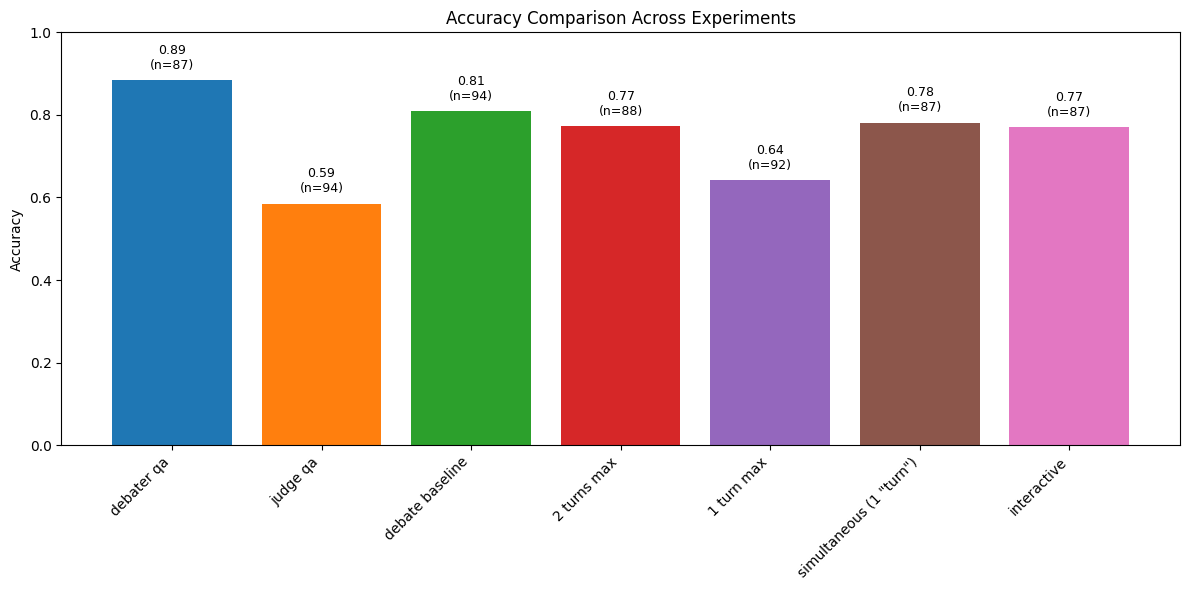

In [247]:
# Cross-experiment comparison
import matplotlib.pyplot as plt

runs = [
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debater_direct', 'judge_direct']),
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_074342/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_080557/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_091635/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_093704/master_results.jsonl', ['debate']),
]

accuracies_list = []
labels_list = []

for results_file, conditions in runs:
    df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
    
    for condition in conditions:
        if condition == 'debate':
            if 'modes.non_interactive.correct' in df.columns:
                col_name = 'modes.non_interactive.correct'
            else:
                col_name = 'modes.interactive.correct'
        else:
            col_name = f'{condition}.correct'
        
        if col_name in df.columns:
            accuracy = df[col_name].mean()
            count = df[col_name].count()
            accuracies_list.append((accuracy, count))
            
            run_id = results_file.split('_')[-2]
            labels_list.append(f"{run_id}_{condition}")

# Custom x-axis labels (one per bar)
custom_labels = ['debater qa', 'judge qa', 'debate baseline', '2 turns max', '1 turn max', 'simultaneous (1 "turn")', 'interactive']
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = range(len(accuracies_list))
accuracies = [a[0] for a in accuracies_list]
counts = [a[1] for a in accuracies_list]
bars = ax.bar(x_pos, accuracies, color=plt.cm.tab10.colors[:len(accuracies_list)])
ax.set_xticks(x_pos)
ax.set_xticklabels(custom_labels, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.set_title('Accuracy Comparison Across Experiments')

for bar, acc, count in zip(bars, accuracies, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{acc:.2f}\n(n={int(count)})',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Why does gpt-4o-mini succeed where gpt-3.5-turbo fails?

In [340]:
gpt_4o_results_file = 'parallel_debate_runs/run_20251022_134354/master_results.jsonl'
gpt_35_results_file = 'parallel_debate_runs/run_20251022_134546/master_results.jsonl'

gpt_4o_mini_results = pd.json_normalize(pd.read_json(gpt_4o_results_file, lines=True).to_dict('records'))
gpt_3_5_turbo_results = pd.json_normalize(pd.read_json(gpt_35_results_file, lines=True).to_dict('records'))

# merge the results
merged = pd.merge(
    gpt_4o_mini_results, 
    gpt_3_5_turbo_results, 
    on='question.question_idx', 
    suffixes=('_4o', '_3.5')
)

In [341]:
judge_cols = ['judge_direct.correct_4o', 'judge_direct.correct_3.5']
mode_cols = ['modes.non_interactive.correct_4o', 'modes.non_interactive.correct_3.5']

for judge_state, group in merged.groupby(judge_cols):
    print(f"\n4o: {judge_state[0]}, 3.5: {judge_state[1]}")
    print(group[mode_cols].value_counts())


4o: False, 3.5: False
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              False                                13
                                  True                                  9
False                             False                                 6
                                  True                                  3
Name: count, dtype: int64

4o: False, 3.5: True
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              False                                6
False                             False                                3
                                  True                                 3
True                              True                                 2
Name: count, dtype: int64

4o: True, 3.5: False
modes.non_interactive.correct_4o  modes.non_interactive.correct_3.5
True                              True                                 12
               

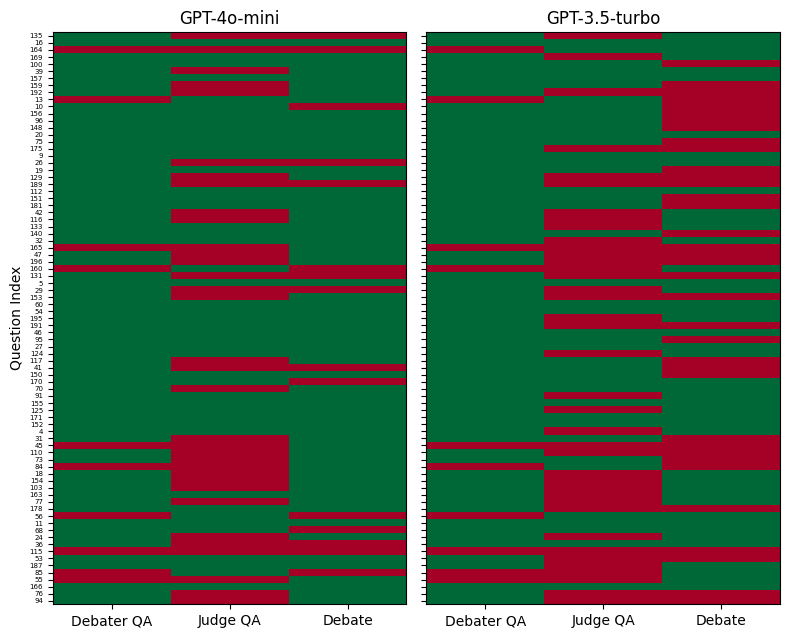

In [342]:
merged_no_nan = merged.dropna()
data_4o = merged_no_nan[['debater_direct.correct_4o', 'judge_direct.correct_4o', f'{mode_prefix}.correct_4o']].astype(float).values
data_35 = merged_no_nan[['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']].astype(float).values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, max(6, len(data_4o) * 0.08)), sharey=True)

for ax, data, title in [(ax1, data_4o, 'GPT-4o-mini'), (ax2, data_35, 'GPT-3.5-turbo')]:
    ax.imshow(data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1, interpolation='nearest')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Debater QA', 'Judge QA', 'Debate'])
    ax.set_title(title)
    # for i in range(len(data) + 1):
    #     ax.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)

ax1.set_yticks(range(len(merged_no_nan)))
ax1.set_yticklabels(merged_no_nan['question.question_idx'].values, fontsize=5)
ax1.set_ylabel('Question Index')

plt.tight_layout()
plt.show()

In [344]:
# Get breakdown of what 3.5 did conditional on 4o going C-I-C (correct, incorrect, correct)
mask_4o_cic = (
    (merged['debater_direct.correct_4o'] == True) & 
    (merged['judge_direct.correct_4o'] == False) & 
    (merged[f'{mode_prefix}.correct_4o'] == True)
)

filtered_35 = merged[mask_4o_cic][['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']]

patterns = filtered_35.apply(lambda row: tuple(row.astype(bool).values), axis=1).value_counts()
pattern_ratios = patterns / patterns.sum()

print(f"When GPT-4o-mini goes C-I-C (n={mask_4o_cic.sum()}):")
print("\nGPT-3.5-turbo patterns:")
for pattern, ratio in pattern_ratios.items():
    labels = ['C' if x else 'I' for x in pattern]
    print(f"  {'-'.join(labels)}: {ratio:.3f}")
print(f"\nSum: {pattern_ratios.sum():.3f}") 


When GPT-4o-mini goes C-I-C (n=24):

GPT-3.5-turbo patterns:
  C-I-I: 0.417
  C-I-C: 0.292
  C-C-I: 0.208
  C-C-C: 0.083

Sum: 1.000


In [345]:
# What is the overall distribution of outcomes for 3.5 (C-I-C, C-I-I, C-C-C, C-C-I, I-I-I, I-I-C, I-C-C, I-C-I). Should sum to one.
# Get overall distribution of outcomes for both models
patterns_4o = merged[['debater_direct.correct_4o', 'judge_direct.correct_4o', f'{mode_prefix}.correct_4o']].apply(
    lambda row: tuple(row.astype(bool).values), axis=1
).value_counts()

pattern_ratios_4o = patterns_4o / patterns_4o.sum()

# Sort 4o patterns by frequency
sorted_patterns_4o = sorted(patterns_4o.items(), key=lambda x: x[1], reverse=True)
sorted_keys_4o = [pattern for pattern, _ in sorted_patterns_4o]

# Get 3.5 patterns
patterns_35 = merged[['debater_direct.correct_3.5', 'judge_direct.correct_3.5', f'{mode_prefix}.correct_3.5']].apply(
    lambda row: tuple(row.astype(bool).values), axis=1
).value_counts()

pattern_ratios_35 = patterns_35 / patterns_35.sum()

# Print 4o patterns sorted by frequency
print("Overall distribution of outcomes for GPT-4o-mini:")
for pattern, count in sorted_patterns_4o:
    labels = ['C' if x else 'I' for x in pattern]
    ratio = pattern_ratios_4o[pattern]
    print(f"  {'-'.join(labels)}: {ratio:.3f} (n={count})")
print(f"\nSum: {pattern_ratios_4o.sum():.3f}")

# Print 3.5 patterns in the same order as 4o
print("\nOverall distribution of outcomes for GPT-3.5-turbo (in same order as 4o):")
for pattern in sorted_keys_4o:
    if pattern in patterns_35:
        labels = ['C' if x else 'I' for x in pattern]
        ratio = pattern_ratios_35[pattern]
        count = patterns_35[pattern]
        print(f"  {'-'.join(labels)}: {ratio:.3f} (n={count})")
    else:
        labels = ['C' if x else 'I' for x in pattern]
        print(f"  {'-'.join(labels)}: 0.000 (n=0)")
print(f"\nSum: {pattern_ratios_35.sum():.3f}")



Overall distribution of outcomes for GPT-4o-mini:
  C-C-C: 0.430 (n=43)
  C-I-C: 0.250 (n=25)
  C-I-I: 0.100 (n=10)
  I-I-I: 0.060 (n=6)
  I-I-C: 0.060 (n=6)
  I-C-C: 0.040 (n=4)
  C-C-I: 0.030 (n=3)
  I-C-I: 0.030 (n=3)

Sum: 1.000

Overall distribution of outcomes for GPT-3.5-turbo (in same order as 4o):
  C-C-C: 0.220 (n=22)
  C-I-C: 0.210 (n=21)
  C-I-I: 0.190 (n=19)
  I-I-I: 0.070 (n=7)
  I-I-C: 0.050 (n=5)
  I-C-C: 0.030 (n=3)
  C-C-I: 0.190 (n=19)
  I-C-I: 0.040 (n=4)

Sum: 1.000
